In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score

df = pd.read_csv(r"C:\Users\juana\OneDrive\Escritorio\Proyecto-3\df.csv", encoding="ISO-8859-1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Armspan_cm  1500 non-null   float64
 1   Height_cm   1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


In [6]:
def to_cm(value):
    try:
        return float(value)
    except:
        try:
            parts = str(value).strip().replace('"','').split("'")
            if len(parts) == 2:
                feet = int(parts[0])
                inches = float(parts[1])
                return round(feet * 30.48 + inches * 2.54, 2)
        except:
            return np.nan
    return np.nan

# Limpiar columnas
df_clean = df[['Height_cm', 'Armspan_cm']].copy()
df_clean['Height_cm'] = df_clean['Height_cm'].apply(to_cm)
df_clean['Armspan_cm'] = df_clean['Armspan_cm'].apply(to_cm)

# Eliminar datos faltantes y filtrar rangos razonables
df_clean.dropna(inplace=True)
df_filtered = df_clean[
    (df_clean['Height_cm'] >= 100) & (df_clean['Height_cm'] <= 220) &
    (df_clean['Armspan_cm'] >= 100) & (df_clean['Armspan_cm'] <= 220)
]
df_filtered.count()

Height_cm     1282
Armspan_cm    1282
dtype: int64

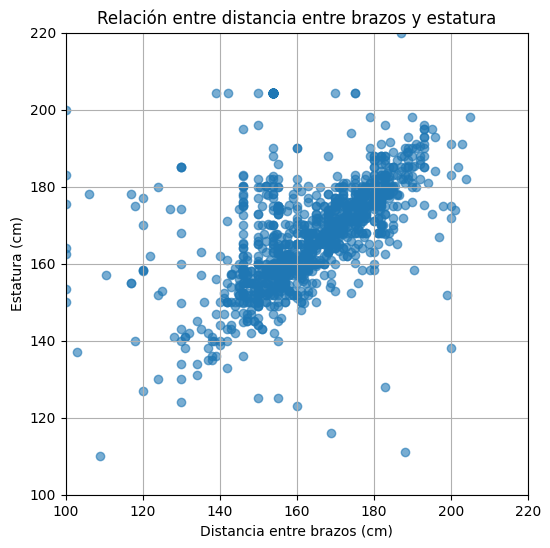

In [8]:
#Punto A
plt.figure(figsize=(6,6))
plt.scatter(df_filtered['Armspan_cm'], df_filtered['Height_cm'], alpha=0.6)
plt.xlabel('Distancia entre brazos (cm)')
plt.ylabel('Estatura (cm)')
plt.title('Relación entre distancia entre brazos y estatura')
plt.xlim(100, 220)
plt.ylim(100, 220)
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()


In [9]:
# Punto C

X = df_filtered['Armspan_cm']
y = df_filtered['Height_cm']

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

print("Pendiente estimada:", model.params['Armspan_cm'])


Pendiente estimada: 0.42833515351702395


In [10]:
# Punto D
Armspan_cm = 65 * 2.54  # 165.1 cm

# Crear DataFrame de predicción con constante
X_pred = pd.DataFrame({'Armspan_cm': [Armspan_cm]})
X_pred = sm.add_constant(X_pred, has_constant='add')  # Muy importante

# Obtener la predicción y su intervalo
pred = model.get_prediction(X_pred)
pred_summary = pred.summary_frame(alpha=0.05)

# Mostrar resultados
print("Estatura predicha:", round(pred_summary['mean'].values[0], 2), "cm")
print("Error estándar:", round(pred_summary['mean_se'].values[0], 2), "cm")
print("Intervalo de predicción 95%:",
      (round(pred_summary['obs_ci_lower'].values[0], 2),
       round(pred_summary['obs_ci_upper'].values[0], 2)))


Estatura predicha: 168.64 cm
Error estándar: 0.35 cm
Intervalo de predicción 95%: (np.float64(144.37), np.float64(192.91))


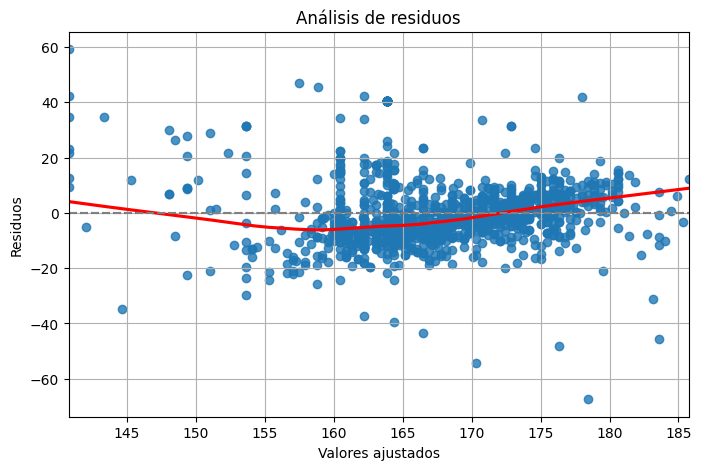

In [11]:
# Punto E
fitted_vals = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(8,5))
sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Análisis de residuos')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()


In [12]:
# Punto F
# H0: No hay relación lineal (pendiente = 0)
# H1: Hay relación lineal (pendiente ≠ 0)

p_valor = model.pvalues['Armspan_cm']
print(f"p-valor: {p_valor}")

if p_valor < 0.05:
    print("Se rechaza H0: hay evidencia de una relación lineal significativa.")
else:
    print("No se rechaza H0: no hay evidencia suficiente de una relación lineal.")

p-valor: 8.257472402961967e-77
Se rechaza H0: hay evidencia de una relación lineal significativa.


In [15]:
# Punto G

conf_int = model.conf_int().loc['Armspan_cm']
print(f"Intervalo de confianza 95% para la pendiente: {conf_int.tolist()}")

if 1 >= conf_int[0] and 1 <= conf_int[1]:
    print("El intervalo contiene 1 compatibilidad con la hipótesis de da Vinci.")
else:
    print("El intervalo no contiene 1 sobre la hipótesis de da Vinci.")

Intervalo de confianza 95% para la pendiente: [0.38605069958910027, 0.47061960744494763]
El intervalo no contiene 1 sobre la hipótesis de da Vinci.


In [ ]:
# Punto H

r = np.corrcoef(df_filtered['Armspan_cm'], df_filtered['Height_cm'])[0,1]
r2 = model.rsquared

print(f"Coeficiente de correlación (r): {r}")
print(f"Coeficiente de determinación (R²): {r2}")

# Interpretación simple
if abs(r) > 0.8:
    print("Relación fuerte entre estatura y distancia entre brazos.")
elif abs(r) > 0.5:
    print("Relación moderada.")
else:
    print("Relación débil.")

Coeficiente de correlación (r): 0.4855826551082149
Coeficiente de determinación (R²): 0.2357905149419437
Relación débil.
